In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)


In [89]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [71]:
print(df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [72]:
df.columns.values

array(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'], dtype=object)

In [101]:
cat_lst = ['international plan', 'voice mail plan', 'churn']
con_lst = [x for x in df.columns.values if x not in cat_lst]

for x in cat_lst:
    print(df[x].value_counts(normalize = True))
    print('\n')
    


no     0.90309
yes    0.09691
Name: international plan, dtype: float64


no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


0    0.855086
1    0.144914
Name: churn, dtype: float64




In [91]:
df['churn'] = df['churn'].astype(str, errors = 'ignore')

df['churn'] = np.where( df['churn']== 'True', 1, 0)

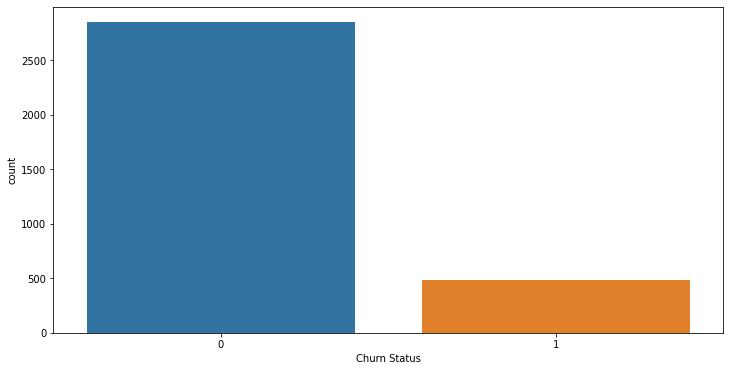

In [99]:
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(x = df.churn)
plt.xlabel('Churn Status')
fig.patch.set_visible(False)
plt.show()

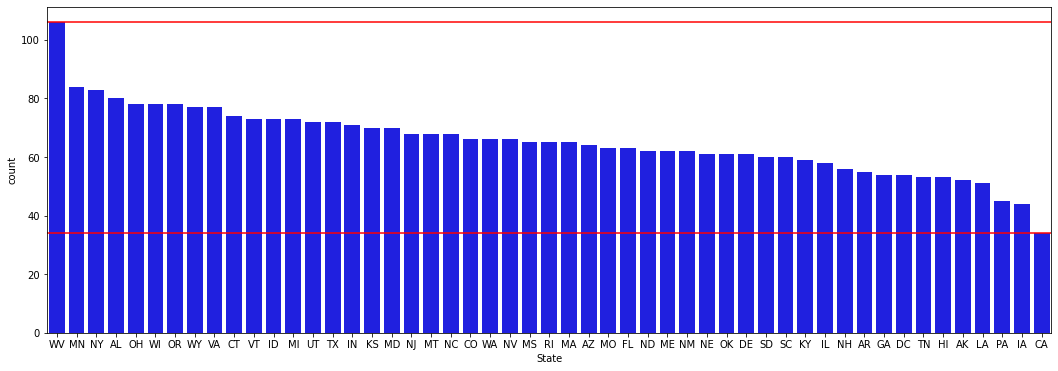

In [112]:
fig, ax = plt.subplots(figsize = (18,6))
sb.countplot(x = df.state, color = 'b',order = df['state'].value_counts().index)
plt.xlabel('State')
plt.axhline(y=max(df['state'].value_counts()), color='r', linestyle='-')
plt.axhline(y=min(df['state'].value_counts()), color='r', linestyle='-')

#fig.patch.set_visible(False)
plt.show()

In [128]:
churn_states_df = df.groupby(['state'])['churn'].value_counts()
churn_states_df

state  churn
AK     0        49
       1         3
AL     0        72
       1         8
AR     0        44
                ..
WI     1         7
WV     0        96
       1        10
WY     0        68
       1         9
Name: churn, Length: 102, dtype: int64

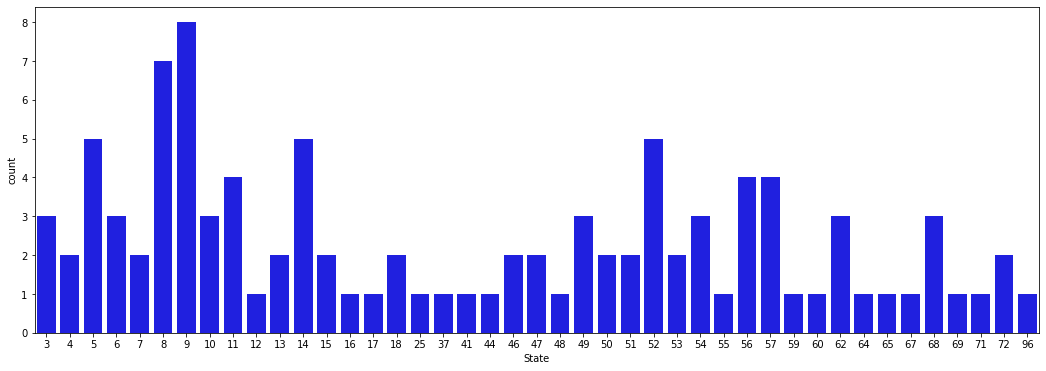

In [119]:
fig, ax = plt.subplots(figsize = (18,6))
sb.countplot(x = df.groupby(['state'])['churn'].value_counts(), color = 'b')
plt.xlabel('State')
# plt.axhline(y=max(df['state'].value_counts()), color='r', linestyle='-')
# plt.axhline(y=min(df['state'].value_counts()), color='r', linestyle='-')

# #fig.patch.set_visible(False)
plt.show()